In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#PassengerId is not an exploitable feature but should be used as an index
train_data = pd.read_csv("/kaggle/input/titanic/train.csv", index_col='PassengerId')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#PassengerId is not an exploitable feature but should be used as an index
test_data = pd.read_csv("/kaggle/input/titanic/test.csv", index_col='PassengerId')
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Data Exploration**

In [4]:
print('Info of the train dataset \n')
display(train_data.info())

print('\nInfo of the test dataset \n')
display(test_data.info())

Info of the train dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None


Info of the test dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


None

#### Data description:

**Survived** - Survival (0 = No; 1 = Yes)

**Pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

**Name** - Passenger's Name

**Sex** - Passenger's Sex

**Age** - Passenger's Age

**Sibsp** - Number of Siblings/Spouses Aboard

**Parch** - Number of Parents/Children Aboard

**Ticket** - Ticket Number

**Fare** - Passenger Fare

**Cabin** - Passenger's Cabin

**Embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [5]:
print('Description of the train dataset \n')
display(train_data.describe())

print('\nDescription of the test dataset \n')
display(test_data.describe())

Description of the train dataset 



,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Description of the test dataset 



,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
print('Training data contains', train_data.duplicated().sum(), 'duplicated values')
print('Training data contains following missing values \n',train_data.isna().sum())

Training data contains 0 duplicated values
Training data contains following missing values 
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [7]:
print('Test data contains', test_data.duplicated().sum(), 'duplicated values')
print('Test data contains following missing values \n',test_data.isna().sum())

Test data contains 0 duplicated values
Test data contains following missing values 
 Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [8]:
#Too much missing values in the "Cabin" feature. It will be removed
print('% of missing "Cabin" values in train_data :', train_data['Cabin'].isna().sum()/len(train_data))
print('% of missing "Cabin" values in test_data :', test_data['Cabin'].isna().sum()/len(test_data))

% of missing "Cabin" values in train_data : 0.7710437710437711
% of missing "Cabin" values in test_data : 0.7822966507177034


In [9]:
#Missing values of the "Age" feature could be replaced by the average age
print('% of missing "Age" values in train_data :', train_data['Age'].isna().sum()/len(train_data))
print('% of missing "Age" values in test_data :', test_data['Age'].isna().sum()/len(test_data))

% of missing "Age" values in train_data : 0.19865319865319866
% of missing "Age" values in test_data : 0.20574162679425836


## **Data Cleaning / Processing**

### Features impact on the survival

In [10]:
#The name of passengers has no impact on the survival
# Same for the ticket number
train_data = train_data.drop(['Name', 'Ticket'], axis = 1)
test_data = test_data.drop(['Name', 'Ticket'], axis = 1)

print('New train dataset \n')
display(train_data.head())

print('\n New test dataset \n')
display(test_data.head())

New train dataset 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S



 New test dataset 



,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,NaN,Q
893,3,female,47.0,1,0,7.0000,NaN,S
894,2,male,62.0,0,0,9.6875,NaN,Q
895,3,male,27.0,0,0,8.6625,NaN,S
896,3,female,22.0,1,1,12.2875,NaN,S


### Types of the features

In [11]:
#The Survived and Pclass features should be considered as categorical, not numerical
train_data['Survived'] = train_data['Survived'].astype('str')
train_data['Pclass'] = train_data['Pclass'].astype('str')
test_data['Pclass'] = test_data['Pclass'].astype('str')

#Let's check the modifications
print('Info of the train dataset \n')
display(train_data.info())

print('\nInfo of the test dataset \n')
display(test_data.info())

Info of the train dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 69.6+ KB


None


Info of the test dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    object 
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 29.4+ KB


None

### Missing values treatment

In [12]:
#Almost 80% of missing values for the "Cabin". The feature should be removed
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

print('New train dataset \n')
display(train_data.head())

print('\n New test dataset \n')
display(test_data.head())

New train dataset 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S



 New test dataset 



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [13]:
#We replace the "Age" missing values by the average age
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

#We check there are no more missing values in the datasets
print('Train data contains following missing values \n',train_data.isna().sum())
print('Test data contains following missing values \n',test_data.isna().sum())

Train data contains following missing values 
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Test data contains following missing values 
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [14]:
#We replace the missing values from the columns "Fare" and "Embarked"

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

#Let's check there are no more missing values
print('Train data contains following missing values \n',train_data.isna().sum())
print('Test data contains following missing values \n',test_data.isna().sum())

Train data contains following missing values 
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Test data contains following missing values 
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## **Statistical analysis - Feature correlations**

### Heatmap

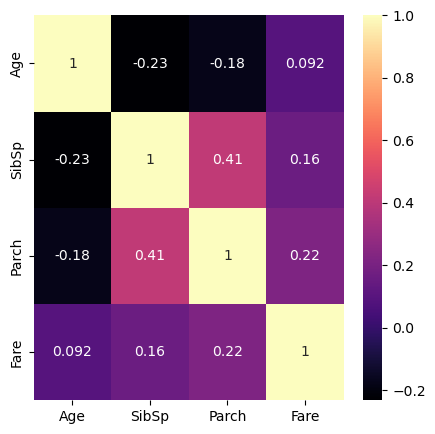

In [15]:
# Display correlations between numerical features
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(train_data.corr(), annot = True, ax = ax, cmap = 'magma');

#### The Heatmap shows there are no significant correlations between the numerical features. We can notice a link between the features "Parch" and "SibSp" both related to the familial statuses of the passengers. 

### Categorical features - Sex

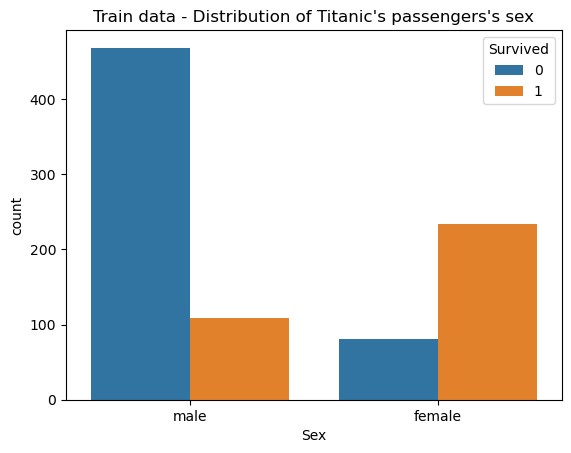

In [16]:
# Repartition by passengers sex and survival state
sns.countplot(x = train_data.Sex, hue=train_data.Survived)
plt.title("Train data - Distribution of Titanic's passengers's sex")
plt.xlabel("Sex");

#### It seems there is a correlation between the sex and the survival. Let's check it with a chi2 contingency test.

In [17]:
from scipy.stats import chi2_contingency

contingency_sex = pd.crosstab(train_data['Sex'], train_data['Survived'])
display(contingency_sex)

#Chi2 test on the contingency table
chi2_sex = chi2_contingency(contingency_sex)

# H0 : There is no influence between the sex and the survival
# H1 : There is a significative inflence between the sex and the survival (p-value < 5%)

#Results
print("The p-value is:", chi2_sex[1])

Survived,0,1
Sex,,
female,81,233
male,468,109


The p-value is: 1.1973570627755645e-58


#### It confirms there is a significant correlation between the sex and the survival. Women had more chance to survive than men.

### Categorical features - Class

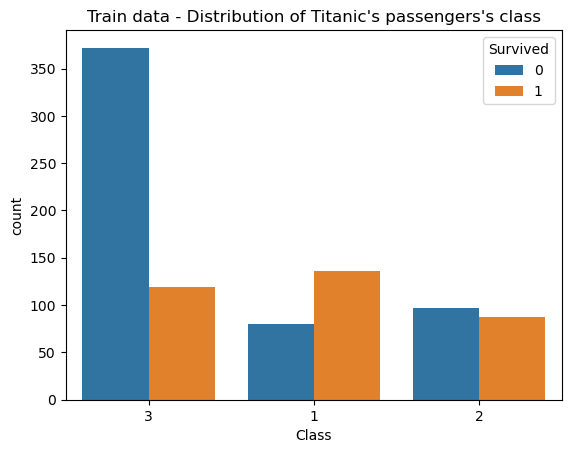

In [18]:
# Repartition by passenger's class and survival state
sns.countplot(x = train_data.Pclass, hue=train_data.Survived)
plt.title("Train data - Distribution of Titanic's passengers's class")
plt.xlabel("Class");

#### The figure shows that those in first class had better chance to survive than those in 3rd class. the passenger's class seems to have an influence on the survival. Let's confirm this with a statistical test.

In [19]:
contingency_class = pd.crosstab(train_data['Pclass'], train_data['Survived'])
display(contingency_class)

#Chi2 test on the contingency table
chi2_class = chi2_contingency(contingency_class)

# H0 : There is no influence between the class and the survival
# H1 : There is a significative inflence between the class and the survival (p-value < 5%)

#Results
print("The p-value is:", chi2_class[1])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


The p-value is: 4.549251711298793e-23


#### It confirms there is a significant correlation between the passenger's class and the survival.

### Categorical features - Embarked

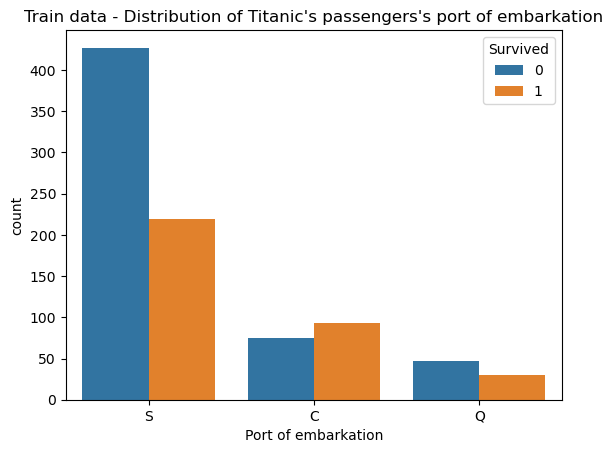

In [20]:
# Repartition by passenger's port of embarkation and survival state
sns.countplot(x = train_data.Embarked, hue=train_data.Survived)
plt.title("Train data - Distribution of Titanic's passengers's port of embarkation")
plt.xlabel("Port of embarkation");

#### Most of the passengers where from Southampton. But it's not easy to say there is a correlation between the port of embarkation and the survival state. Let's check the correlation.

In [21]:
contingency_emb = pd.crosstab(train_data['Embarked'], train_data['Survived'])
display(contingency_emb)

#Chi2 test on the contingency table
chi2_emb = chi2_contingency(contingency_emb)

# H0 : There is no influence between the port of embarkation and the survival
# H1 : There is a significative inflence between the port of embarkation and the survival (p-value < 5%)

#Results
print("The p-value is:", chi2_emb[1])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


The p-value is: 2.3008626481449577e-06


#### The port of embarkation seems to be statistically significant.

### Numerical features - Age

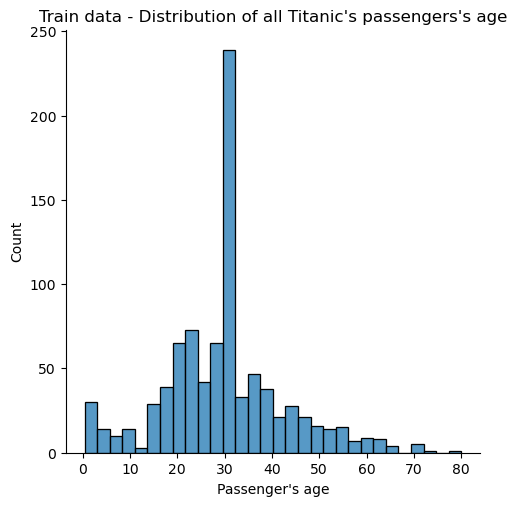

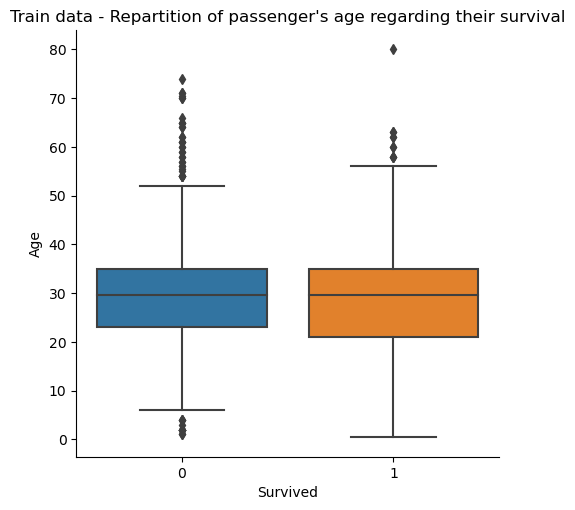

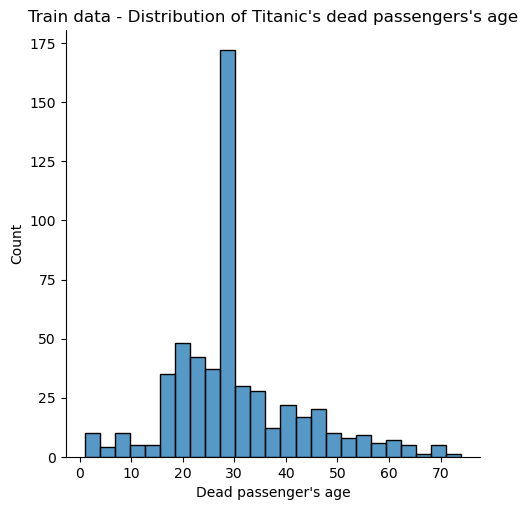

In [22]:
#Dataset of only dead passengers
age_dead = train_data[train_data['Survived']=='0']

#Distribution of the passenger's regarding their age and survival

sns.displot(train_data.Age)
plt.title("Train data - Distribution of all Titanic's passengers's age")
plt.xlabel("Passenger's age")

sns.catplot(x = 'Survived', y = 'Age', kind = 'box', data = train_data)
plt.title("Train data - Repartition of passenger's age regarding their survival")
plt.xlabel("Survived")


age_dead = train_data[train_data['Survived']=='0']
sns.displot(age_dead.Age)
plt.title("Train data - Distribution of Titanic's dead passengers's age")
plt.xlabel("Dead passenger's age");

#### The graphic shows there seems to be an equivalent repartition of age between those who survived and those who didn't. Nevetheless, we notice more aged passengers among the dead. Let's check it with a statistical test.

In [23]:
import statsmodels.api

# H0 : There is no influence between passenger's age and their survival
# H1 : There is a significative inflence between passenger's age and their survival (p-value < 5%)

#Results
result = statsmodels.formula.api.ols('Age ~ Survived', data = train_data).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,733.209612,733.209612,4.353516,0.037217
Residual,889.0,149723.426332,168.417802,NaN,NaN


#### The passenger's age has a significative influence on the survival

### Numerical Features - Fare

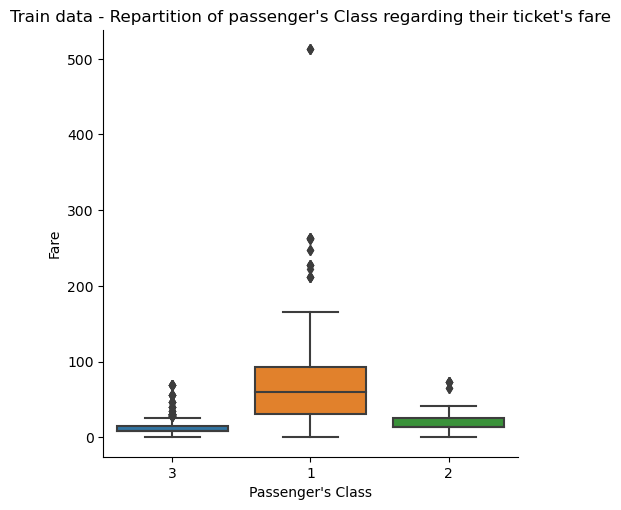

In [24]:
# There should be a link between the tickets fare and the class
# Let's check this

sns.catplot(x = 'Pclass', y = 'Fare', kind = 'box', data = train_data)
plt.title("Train data - Repartition of passenger's Class regarding their ticket's fare")
plt.xlabel("Passenger's Class");

#### This graph shows there is a correlation between those 2 features. We shall only select one of them for the modeling. We can verify it with a statistical test.

In [25]:
# H0 : There is no correlation between passenger's fare and their class
# H1 : There is a significative correlation between passenger's fare and their class (p-value < 5%)

#Results
result = statsmodels.formula.api.ols('Fare ~ Pclass', data = train_data).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Pclass,2.0,7.760301e+05,388015.028289,242.344157,1.031376e-84
Residual,888.0,1.421769e+06,1601.090919,NaN,NaN


#### There is a strong correlation between those two features. We shall consider only the Pclass feature.

### Numerical features - SibSp

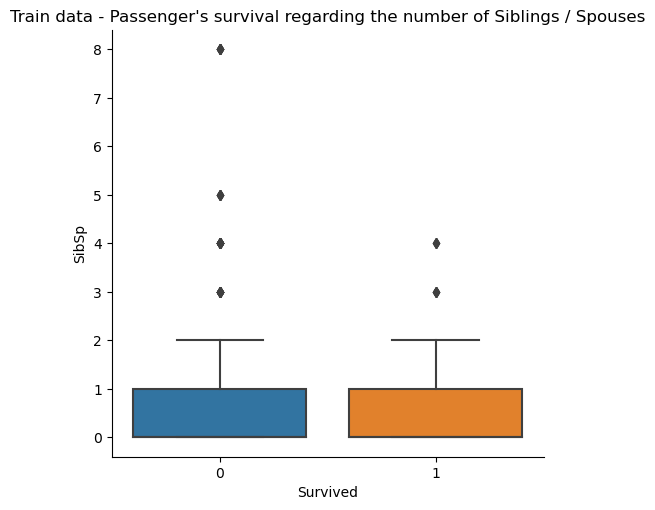

In [26]:
#Does the number of siblings / spouses had an influence on passenger's survival?

sns.catplot(x = 'Survived', y = 'SibSp', kind = 'box', data = train_data)
plt.title("Train data - Passenger's survival regarding the number of Siblings / Spouses")
plt.xlabel("Survived");

#### This graph tends to show that the number of siblings / spouses had no impact ont the survival issue.

In [27]:
# H0 : There is no correlation between passenger's siblings/spouse number and their their survival
# H1 : There is a significative correlation between passenger's siblings/spouse and their survival (p-value < 5%)

#Results
result = statsmodels.formula.api.ols('SibSp ~ Survived', data = train_data).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,1.350336,1.350336,1.110572,0.292244
Residual,889.0,1080.928003,1.215892,NaN,NaN


#### The ANOVA test confirms that the SibSp feature has no influence on the target Survived

### Numerical features - Parch

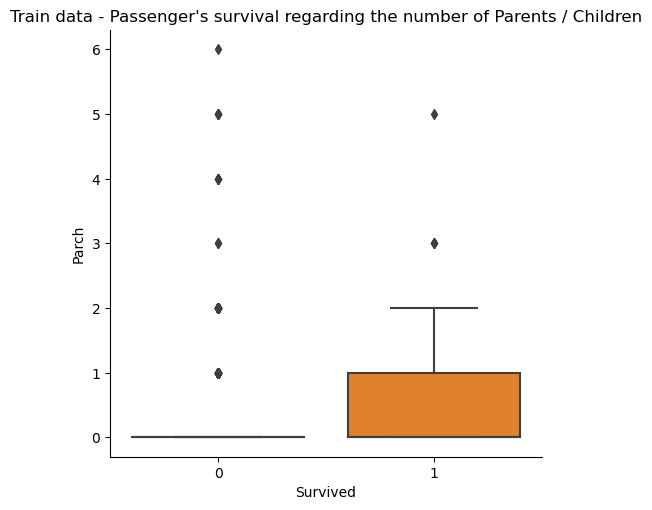

In [28]:
#Does the number of parents/children had an influence on passenger's survival?

sns.catplot(x = 'Survived', y = 'Parch', kind = 'box', data = train_data)
plt.title("Train data - Passenger's survival regarding the number of Parents / Children")
plt.xlabel("Survived");

#### The graph clearly shows there was a great impact of Parch on the survival issue.

In [29]:
# H0 : There is no correlation between passenger's parents/children number and their their survival
# H1 : There is a significative correlation between passenger's parents/children and their survival (p-value < 5%)

#Results
result = statsmodels.formula.api.ols('Parch ~ Survived', data = train_data).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,3.853142,3.853142,5.963464,0.014799
Residual,889.0,574.404995,0.646125,NaN,NaN


## Machine Learning

In [30]:
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

### Data preparation

In [31]:
y = train_data["Survived"]

#We select all the features which appeared to be statiscally siginificant
features = ["Pclass", "Sex", 'Age', "Parch", 'Embarked']

#We get dummy variables from the categorical features
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [32]:
#Numerical values standardization
#We see that variables 'Age' and 'Parch' are measured at different scales

cols = ['Age', 'Parch']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

X_test.head()

,Age,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,0.369449,-0.473674,0,0,1,0,1,0,1,0
893,1.331378,-0.473674,0,0,1,1,0,0,0,1
894,2.485693,-0.473674,0,1,0,0,1,0,1,0
895,-0.207709,-0.473674,0,0,1,0,1,0,0,1
896,-0.592481,0.767630,0,0,1,1,0,0,0,1


In [33]:
#Cross validator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Random Forest

In [34]:
'''
#Initialization, training and predictions of the classifier
modelRF = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
modelRF.fit(X_train, y)
predictionsRF = modelRF.predict(X_test)

#Output
outputRF = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsRF})
outputRF.to_csv('submissionRF.csv', index=False)
print("Your submission was successfully saved!")

outputRF.head()
'''

'\n#Initialization, training and predictions of the classifier\nmodelRF = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)\nmodelRF.fit(X_train, y)\npredictionsRF = modelRF.predict(X_test)\n\n#Output\noutputRF = pd.DataFrame({\'PassengerId\': test_data.index, \'Survived\': predictionsRF})\noutputRF.to_csv(\'submissionRF.csv\', index=False)\nprint("Your submission was successfully saved!")\n\noutputRF.head()\n'

#### RF model optimization

In [35]:
'''
#Optimization of the RF classifier
parameters_rf= {
                'n_estimators':[100, 200,300,400,500,600,700],
                'criterion': ['gini', 'entropy'],
                'max_features': ['auto', 'sqrt', 'log2']
                }

# We apply the Gridsearch to the RF model
grid_rf=GridSearchCV(modelRF,param_grid=parameters_rf,cv=cv)

#We train the grid
train_grid_rf = grid_rf.fit(X_train, y)

# We find the best hyperparameters 
print('RF model best score is %f with parameters %s'%(train_grid_rf.best_score_, train_grid_rf.best_params_))
'''

"\n#Optimization of the RF classifier\nparameters_rf= {\n                'n_estimators':[100, 200,300,400,500,600,700],\n                'criterion': ['gini', 'entropy'],\n                'max_features': ['auto', 'sqrt', 'log2']\n                }\n\n# We apply the Gridsearch to the RF model\ngrid_rf=GridSearchCV(modelRF,param_grid=parameters_rf,cv=cv)\n\n#We train the grid\ntrain_grid_rf = grid_rf.fit(X_train, y)\n\n# We find the best hyperparameters \nprint('RF model best score is %f with parameters %s'%(train_grid_rf.best_score_, train_grid_rf.best_params_))\n"

In [36]:
'''
# We define the optimized model
modelRF_opt = RandomForestClassifier(n_estimators = train_grid_rf.best_params_['n_estimators'], 
                                     criterion = train_grid_rf.best_params_['criterion'],
                                     max_features = train_grid_rf.best_params_['max_features'],
                                    )
modelRF_opt.fit(X_train, y)
predictionsRF_opt = modelRF_opt.predict(X_test)

#Output
outputRF_opt = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsRF_opt})
outputRF_opt.to_csv('submissionRF_opt.csv', index=False)
print("Your submission was successfully saved!")

outputRF_opt.head()
'''

'\n# We define the optimized model\nmodelRF_opt = RandomForestClassifier(n_estimators = train_grid_rf.best_params_[\'n_estimators\'], \n                                     criterion = train_grid_rf.best_params_[\'criterion\'],\n                                     max_features = train_grid_rf.best_params_[\'max_features\'],\n                                    )\nmodelRF_opt.fit(X_train, y)\npredictionsRF_opt = modelRF_opt.predict(X_test)\n\n#Output\noutputRF_opt = pd.DataFrame({\'PassengerId\': test_data.index, \'Survived\': predictionsRF_opt})\noutputRF_opt.to_csv(\'submissionRF_opt.csv\', index=False)\nprint("Your submission was successfully saved!")\n\noutputRF_opt.head()\n'

### Logistic Regression

In [37]:
'''
#Initialization, training and predictions of the classifier
modelLR = LogisticRegression()
modelLR.fit(X_train, y)
predictionsLR = modelLR.predict(X_test)


#Output
outputLR = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsRF})
outputLR.to_csv('submissionLR.csv', index=False)
print("Your submission was successfully saved!")

outputLR.head()
'''

'\n#Initialization, training and predictions of the classifier\nmodelLR = LogisticRegression()\nmodelLR.fit(X_train, y)\npredictionsLR = modelLR.predict(X_test)\n\n\n#Output\noutputLR = pd.DataFrame({\'PassengerId\': test_data.index, \'Survived\': predictionsRF})\noutputLR.to_csv(\'submissionLR.csv\', index=False)\nprint("Your submission was successfully saved!")\n\noutputLR.head()\n'

#### LR model optimization

In [38]:
'''
#Optimization of the LR classifier
parameters_lr = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty' : [None, 'l1', 'l2', 'elasticnet'],
                 'C' : [100, 10, 1.0, 0.1, 0.01]
                }

# We apply the Gridsearch to the LR model
grid_lr=GridSearchCV(modelLR,param_grid=parameters_lr,cv=cv)

#We train the grid
train_grid_lr = grid_lr.fit(X_train, y)

# We find the best hyperparameters 
print('LR model best score is %f with parameters %s'%(train_grid_lr.best_score_, train_grid_lr.best_params_))
'''

"\n#Optimization of the LR classifier\nparameters_lr = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\n                 'penalty' : [None, 'l1', 'l2', 'elasticnet'],\n                 'C' : [100, 10, 1.0, 0.1, 0.01]\n                }\n\n# We apply the Gridsearch to the LR model\ngrid_lr=GridSearchCV(modelLR,param_grid=parameters_lr,cv=cv)\n\n#We train the grid\ntrain_grid_lr = grid_lr.fit(X_train, y)\n\n# We find the best hyperparameters \nprint('LR model best score is %f with parameters %s'%(train_grid_lr.best_score_, train_grid_lr.best_params_))\n"

In [39]:
'''
# We define the optimized model
modelLR_opt = LogisticRegression(solver = train_grid_lr.best_params_['solver'],
                                 penalty = train_grid_lr.best_params_['penalty'],
                                 C = train_grid_lr.best_params_['C']
                                )
modelLR_opt.fit(X_train, y)
predictionsLR_opt = modelLR_opt.predict(X_test)

#Output
outputLR_opt = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsLR_opt})
outputLR_opt.to_csv('submissionLR_opt.csv', index=False)
print("Your submission was successfully saved!")

outputLR_opt.head()
'''

'\n# We define the optimized model\nmodelLR_opt = LogisticRegression(solver = train_grid_lr.best_params_[\'solver\'],\n                                 penalty = train_grid_lr.best_params_[\'penalty\'],\n                                 C = train_grid_lr.best_params_[\'C\']\n                                )\nmodelLR_opt.fit(X_train, y)\npredictionsLR_opt = modelLR_opt.predict(X_test)\n\n#Output\noutputLR_opt = pd.DataFrame({\'PassengerId\': test_data.index, \'Survived\': predictionsLR_opt})\noutputLR_opt.to_csv(\'submissionLR_opt.csv\', index=False)\nprint("Your submission was successfully saved!")\n\noutputLR_opt.head()\n'

### KNN

In [40]:
'''
#Initialization, training and predictions of the classifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y)
predictionsKNN = modelKNN.predict(X_test)

#Output
outputKNN = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsKNN})
outputKNN.to_csv('submissionKNN.csv', index=False)
print("Your submission was successfully saved!")

outputKNN.head()
'''

'\n#Initialization, training and predictions of the classifier\nmodelKNN = KNeighborsClassifier()\nmodelKNN.fit(X_train, y)\npredictionsKNN = modelKNN.predict(X_test)\n\n#Output\noutputKNN = pd.DataFrame({\'PassengerId\': test_data.index, \'Survived\': predictionsKNN})\noutputKNN.to_csv(\'submissionKNN.csv\', index=False)\nprint("Your submission was successfully saved!")\n\noutputKNN.head()\n'

#### KNN model optimization

In [41]:
'''
#Optimization of the KNN classifier
parameters_knn = {
                'n_neighbors' : range(1, 21, 2),
                'weights' : ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan', 'minkowski']
                 }

# We apply the Gridsearch to the KNN model
grid_KNN=GridSearchCV(modelKNN,param_grid=parameters_knn,cv=cv)

#We train the grid
train_grid_knn = grid_KNN.fit(X_train, y)

# We find the best hyperparameters 
print('KNN model best score is %f with parameters %s'%(train_grid_knn.best_score_, train_grid_knn.best_params_))
'''

"\n#Optimization of the KNN classifier\nparameters_knn = {\n                'n_neighbors' : range(1, 21, 2),\n                'weights' : ['uniform', 'distance'],\n                'metric' : ['euclidean', 'manhattan', 'minkowski']\n                 }\n\n# We apply the Gridsearch to the KNN model\ngrid_KNN=GridSearchCV(modelKNN,param_grid=parameters_knn,cv=cv)\n\n#We train the grid\ntrain_grid_knn = grid_KNN.fit(X_train, y)\n\n# We find the best hyperparameters \nprint('KNN model best score is %f with parameters %s'%(train_grid_knn.best_score_, train_grid_knn.best_params_))\n"

In [42]:
'''
# We define the optimized model
modelKNN_opt = KNeighborsClassifier(n_neighbors = train_grid_knn.best_params_['n_neighbors'], 
                                   weights = train_grid_knn.best_params_['weights'],
                                   metric = train_grid_knn.best_params_['metric'],
                                  )
modelKNN_opt.fit(X_train, y)
predictionsKNN_opt = modelKNN_opt.predict(X_test)

#Output
outputKNN_opt = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsKNN_opt})
outputKNN_opt.to_csv('submissionKNN_opt.csv', index=False)
print("Your submission was successfully saved!")

outputKNN_opt.head()
'''

'\n# We define the optimized model\nmodelKNN_opt = KNeighborsClassifier(n_neighbors = train_grid_knn.best_params_[\'n_neighbors\'], \n                                   weights = train_grid_knn.best_params_[\'weights\'],\n                                   metric = train_grid_knn.best_params_[\'metric\'],\n                                  )\nmodelKNN_opt.fit(X_train, y)\npredictionsKNN_opt = modelKNN_opt.predict(X_test)\n\n#Output\noutputKNN_opt = pd.DataFrame({\'PassengerId\': test_data.index, \'Survived\': predictionsKNN_opt})\noutputKNN_opt.to_csv(\'submissionKNN_opt.csv\', index=False)\nprint("Your submission was successfully saved!")\n\noutputKNN_opt.head()\n'

### SVM

In [43]:
'''
#Initialization, training and predictions of the classifier
modelSVM = SVC()
modelSVM.fit(X_train, y)
predictionsSVM = modelSVM.predict(X_test)


#Output
outputSVM = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsSVM})
outputSVM.to_csv('submissionSVM.csv', index=False)
print("Your submission was successfully saved!")

outputSVM.head()
'''

'\n#Initialization, training and predictions of the classifier\nmodelSVM = SVC()\nmodelSVM.fit(X_train, y)\npredictionsSVM = modelSVM.predict(X_test)\n\n\n#Output\noutputSVM = pd.DataFrame({\'PassengerId\': test_data.index, \'Survived\': predictionsSVM})\noutputSVM.to_csv(\'submissionSVM.csv\', index=False)\nprint("Your submission was successfully saved!")\n\noutputSVM.head()\n'

#### SVM model optimization

In [44]:
'''
#Optimization of the SVM classifier
parameters_svm = {'kernel':['poly', 'rbf', 'sigmoid'],
                  'C' :[100, 10, 1.0, 0.1, 0.001]
                 }

# We apply the Gridsearch to the SVM model
grid_svm=GridSearchCV(modelSVM,param_grid=parameters_svm,cv=cv)

#We train the grid
train_grid_svm = grid_svm.fit(X_train, y)

# We find the best hyperparameters 
print('SVM model best score is %f with parameters %s'%(train_grid_svm.best_score_, train_grid_svm.best_params_))
'''

"\n#Optimization of the SVM classifier\nparameters_svm = {'kernel':['poly', 'rbf', 'sigmoid'],\n                  'C' :[100, 10, 1.0, 0.1, 0.001]\n                 }\n\n# We apply the Gridsearch to the SVM model\ngrid_svm=GridSearchCV(modelSVM,param_grid=parameters_svm,cv=cv)\n\n#We train the grid\ntrain_grid_svm = grid_svm.fit(X_train, y)\n\n# We find the best hyperparameters \nprint('SVM model best score is %f with parameters %s'%(train_grid_svm.best_score_, train_grid_svm.best_params_))\n"

In [45]:
'''
# We define the optimized model
modelSVM_opt = SVC(kernel = 'poly',
                   C = 0.1
                  )

modelSVM_opt.fit(X_train, y)
predictionsSVM_opt = modelSVM_opt.predict(X_test)

#Output
outputSVM_opt = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsSVM_opt})
outputSVM_opt.to_csv('submission.csv', index=False)
'''

"\n# We define the optimized model\nmodelSVM_opt = SVC(kernel = 'poly',\n                   C = 0.1\n                  )\n\nmodelSVM_opt.fit(X_train, y)\npredictionsSVM_opt = modelSVM_opt.predict(X_test)\n\n#Output\noutputSVM_opt = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsSVM_opt})\noutputSVM_opt.to_csv('submission.csv', index=False)\n"

### Gradient Boosting

In [46]:
#Initialization, training and predictions of the classifier
modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, y)
predictionsGB = modelGB.predict(X_test)


#Output
outputGB = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsGB})
outputGB.to_csv('submission.csv', index=False)

#### Gradient Boosting model optimization

In [47]:
'''
#Optimization of the GB classifier
parameters_gb = {'n_estimators':[10, 100, 1000],
                 'learning_rate' :[0.001, 0.01, 0.1],
                 'subsample' :[0.5, 0.7, 1.0],
                 'max_depth' :[3, 7, 9]
                 }

# We apply the Gridsearch to the GB model
grid_gb=GridSearchCV(modelGB,param_grid=parameters_gb,cv=cv)

#We train the grid
train_grid_gb = grid_gb.fit(X_train, y)

# We find the best hyperparameters 
print('GB model best score is %f with parameters %s'%(train_grid_gb.best_score_, train_grid_gb.best_params_))
'''

"\n#Optimization of the GB classifier\nparameters_gb = {'n_estimators':[10, 100, 1000],\n                 'learning_rate' :[0.001, 0.01, 0.1],\n                 'subsample' :[0.5, 0.7, 1.0],\n                 'max_depth' :[3, 7, 9]\n                 }\n\n# We apply the Gridsearch to the GB model\ngrid_gb=GridSearchCV(modelGB,param_grid=parameters_gb,cv=cv)\n\n#We train the grid\ntrain_grid_gb = grid_gb.fit(X_train, y)\n\n# We find the best hyperparameters \nprint('GB model best score is %f with parameters %s'%(train_grid_gb.best_score_, train_grid_gb.best_params_))\n"

### Deep Learning

In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

#### Data Preparation

In [49]:
print(X_train.dtypes)
print(X_test.dtypes)

Age           float64
Parch         float64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object
Age           float64
Parch         float64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object


In [50]:
# We transform the types uint8 in float so they'll be processed by the Neural Network
X_train['Pclass_1'] = X_train['Pclass_1'].astype('float')
X_train['Pclass_2'] = X_train['Pclass_2'].astype('float')
X_train['Pclass_3'] = X_train['Pclass_3'].astype('float')
X_train['Sex_female'] = X_train['Sex_female'].astype('float')
X_train['Sex_male'] = X_train['Sex_male'].astype('float')
X_train['Embarked_C'] = X_train['Embarked_C'].astype('float')
X_train['Embarked_Q'] = X_train['Embarked_Q'].astype('float')
X_train['Embarked_S'] = X_train['Embarked_S'].astype('float')

# Same for the X_test dataset
X_test['Pclass_1'] = X_test['Pclass_1'].astype('float')
X_test['Pclass_2'] = X_test['Pclass_2'].astype('float')
X_test['Pclass_3'] = X_test['Pclass_3'].astype('float')
X_test['Sex_female'] = X_test['Sex_female'].astype('float')
X_test['Sex_male'] = X_test['Sex_male'].astype('float')
X_test['Embarked_C'] = X_test['Embarked_C'].astype('float')
X_test['Embarked_Q'] = X_test['Embarked_Q'].astype('float')
X_test['Embarked_S'] = X_test['Embarked_S'].astype('float')

In [51]:
y = y.astype('float')

In [52]:
#Initialization of a neural network
inputs = Input(shape = X_train.shape[1])

#Dense layers
first_layer = Dense(units = 10, activation = 'tanh')
second_layer = Dense(units = 10, activation = 'tanh')
third_layer = Dense(units = 1, activation = 'sigmoid')

#Operations
x = first_layer(inputs)
x = second_layer(x)
outputs = third_layer(x)

#Creation of the model
model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = 'accuracy')

In [54]:
training_history = model.fit(X_train, y, epochs = 20, batch_size = 50, validation_split = 0.2)

Epoch 1/20
15/15 [==============================] - 1s 16ms/step - loss: 0.7034 - accuracy: 0.5632 - val_loss: 0.6461 - val_accuracy: 0.6369
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.5927 - val_loss: 0.6148 - val_accuracy: 0.6536
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6375 - accuracy: 0.6292 - val_loss: 0.5898 - val_accuracy: 0.6816
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6142 - accuracy: 0.6728 - val_loss: 0.5700 - val_accuracy: 0.6872
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.5930 - accuracy: 0.6854 - val_loss: 0.5521 - val_accuracy: 0.6983
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.6966 - val_loss: 0.5340 - val_accuracy: 0.7430
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5554 - accuracy: 0.7416 - val_loss: 0.5179 - val_accuracy: 0.7933
Epoch 8/20
15/15 [=

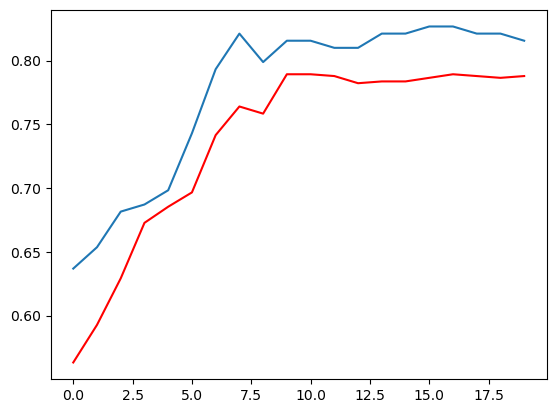

In [55]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.plot(val_acc)
plt.plot(train_acc, 'r');

In [56]:
# Predictions of the Neural Network
predictionsNN = model.predict(X_test)
predictionsNN = list(predictionsNN)
#Output
outputNN = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictionsNN})
outputNN.to_csv('submission.csv', index=False)

14/14 [==============================] - 0s 1ms/step


In [57]:
outputNN[0:20]

,PassengerId,Survived
0,892,[0.104849696]
1,893,[0.498782]
2,894,[0.19121827]
3,895,[0.09984886]
4,896,[0.5866339]
5,897,[0.15577061]
6,898,[0.6563386]
7,899,[0.18739249]
8,900,[0.7374818]
9,901,[0.120616995]
